##: Import all libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,balanced_accuracy_score


##Read the data given in data.csv

In [4]:
data=pd.read_excel('/content/data.xlsx')                                #read excel file

In [5]:
data

,Cancer stage,Clump thickness,No of week,Clump thickness_new,No of week_new,True cancer stage
0,1.0,10.510076,6.166544,10.269649,11.999203,1
1,1.0,11.739776,7.024066,10.494287,6.495638,1
2,1.0,7.857070,5.909366,8.516879,7.102108,1
3,1.0,10.817929,5.920890,8.979736,9.196251,1
4,1.0,10.302407,6.984937,9.553005,7.120283,1
...,...,...,...,...,...,...
1995,NaN,NaN,NaN,4.834644,15.479706,4
1996,NaN,NaN,NaN,1.874446,12.696803,4
1997,NaN,NaN,NaN,2.047665,14.852635,4
1998,NaN,NaN,NaN,2.176251,12.112125,4


In [6]:
test_df=data.iloc[:200]
test_df['Cancer stage']=test_df['Cancer stage'].astype(str)

<ipython-input-6-648cf6404d0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Cancer stage']=test_df['Cancer stage'].astype(str)


In [7]:
train_df=data.iloc[200:2000].reset_index()                      #slicing data
train_df

,index,Cancer stage,Clump thickness,No of week,Clump thickness_new,No of week_new,True cancer stage
0,200,NaN,NaN,NaN,10.475861,6.958337,1
1,201,NaN,NaN,NaN,11.412233,6.384493,1
2,202,NaN,NaN,NaN,10.022608,8.314155,1
3,203,NaN,NaN,NaN,9.952131,6.544933,1
4,204,NaN,NaN,NaN,11.701335,5.257651,1
...,...,...,...,...,...,...,...
1795,1995,NaN,NaN,NaN,4.834644,15.479706,4
1796,1996,NaN,NaN,NaN,1.874446,12.696803,4
1797,1997,NaN,NaN,NaN,2.047665,14.852635,4
1798,1998,NaN,NaN,NaN,2.176251,12.112125,4


##Step3: show a scatter plot of ‘Clump thickness vs No of week’ and plot their class labels given in column ‘Cancer stage’ (1, 2, 3, 4) for all 200 datapoints. See the reference output image below

<ipython-input-9-9a413bf77210>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['class']=pd.factorize(test_df['Cancer stage'])[0]
<ipython-input-9-9a413bf77210>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=sub['Clump thickness'],y=sub['No of week'],marker='o',cmap='hsv',s=30,label=f'Cancer stage:{i+1}')


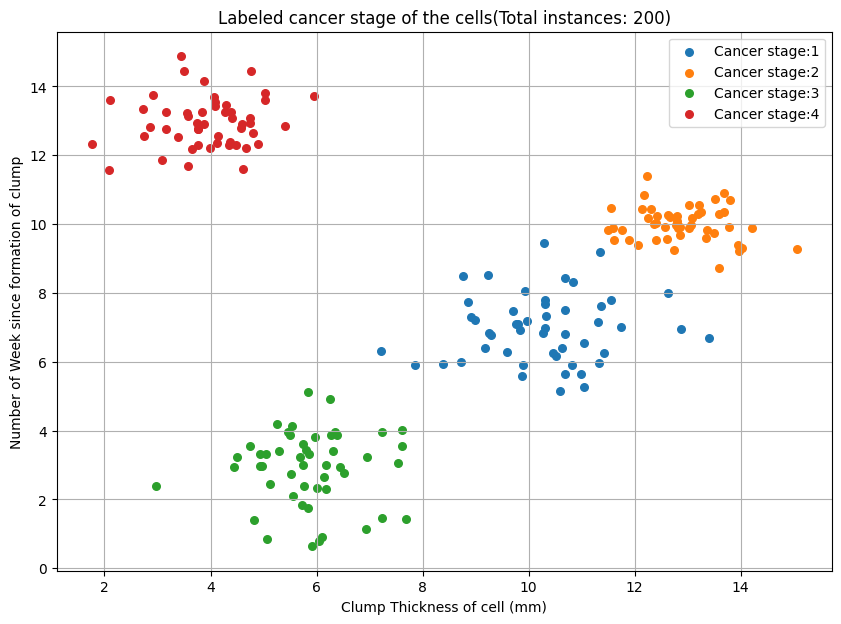

In [9]:
#scatter plot of labelled data
test_df['class']=pd.factorize(test_df['Cancer stage'])[0]
plt.figure(figsize=(10,7))
for i in test_df['class'].unique():
  sub=test_df[test_df['class']==i]
  plt.scatter(x=sub['Clump thickness'],y=sub['No of week'],marker='o',cmap='hsv',s=30,label=f'Cancer stage:{i+1}')
plt.legend()
plt.title('Labeled cancer stage of the cells(Total instances: 200)')
plt.xlabel('Clump Thickness of cell (mm)')
plt.ylabel('Number of Week since formation of clump')
plt.grid()



##Step4: Now, Plot the other added 1800 datapoints given in columns ‘Clump thickness_new’ and ‘No of week_new’ over the previous scatter plot without using their class label. See the reference output image below

<ipython-input-10-3f82b730030b>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=sub['Clump thickness'],y=sub['No of week'],marker='o',cmap='hsv',s=30,label=f'Cancer stage:{i+1}')


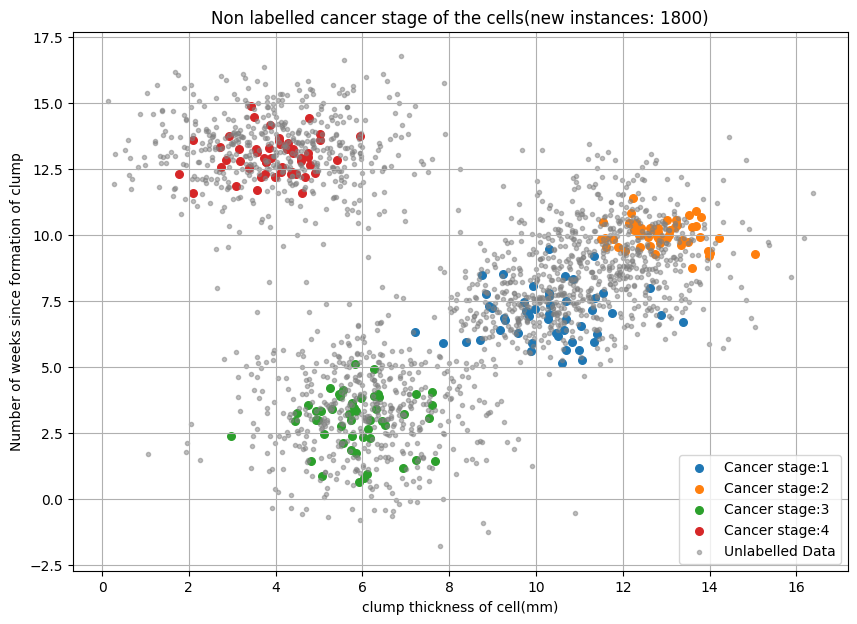

In [10]:
#scatter plot of labelled and unlabelled data
plt.figure(figsize=(10,7))
for i in test_df['class'].unique():
  sub=test_df[test_df['class']==i]
  plt.scatter(x=sub['Clump thickness'],y=sub['No of week'],marker='o',cmap='hsv',s=30,label=f'Cancer stage:{i+1}')

plt.scatter(train_df['Clump thickness_new'],train_df['No of week_new'],c='grey',marker='.',alpha=0.5,label='Unlabelled Data')
plt.title('Non labelled cancer stage of the cells(new instances: 1800)')
plt.xlabel('clump thickness of cell(mm)')
plt.ylabel('Number of weeks since formation of clump')
plt.grid()
plt.legend()


##Step5: Now train the semi supervised model for the labeled 200 datapoints and make predictions for class label of  new 2000 added datapoints and plot the scatters. Use KNN for base estimator. Use Model.fit() and model.predict() for training and prediction

In [11]:
#creating test and train set
x_test=test_df[['Clump thickness','No of week']]
y_test=test_df[['Cancer stage']]
y_test['Cancer stage']=y_test['Cancer stage'].astype('float')
x_train=train_df[['Clump thickness_new','No of week_new']]
x_train.columns=['Clump thickness','No of week']

<ipython-input-11-4eb5481ecf28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Cancer stage']=y_test['Cancer stage'].astype('float')


In [12]:
#applying self training classifier with KNN as base
knn=KNeighborsClassifier()
self_train=SelfTrainingClassifier(knn)
self_train.fit(x_test,y_test)
pred=self_train.predict(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


Text(0, 0.5, 'No of weeks since clump formation')

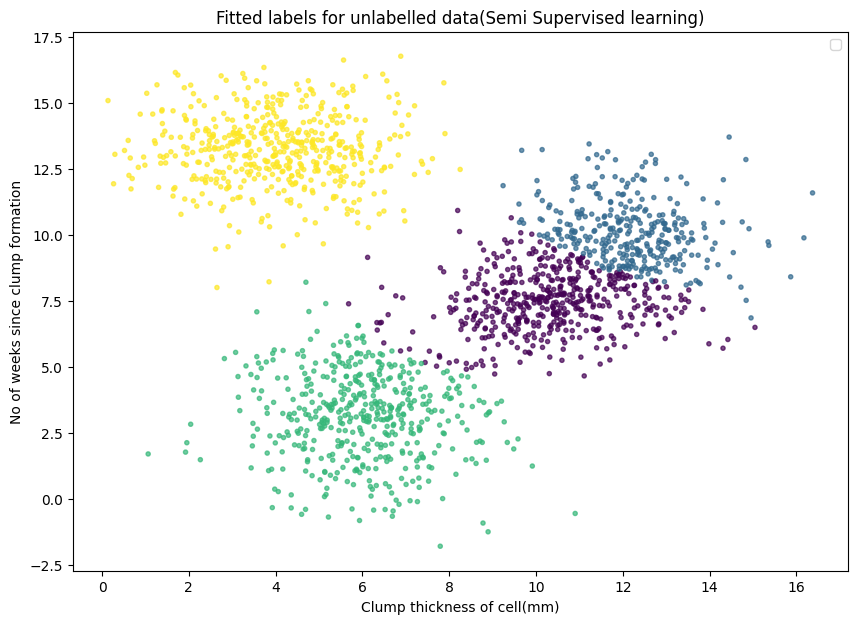

In [15]:
#plot of 1800 unlabelled self trained clusters
plt.figure(figsize=(10,7))
"""
for i in test_df['class'].unique():
  sub=test_df[test_df['class']==i]
  plt.scatter(x=sub['Clump thickness'],y=sub['No of week'],marker='o',cmap='viridis',s=30,alpha=1)
"""
plt.scatter(x=x_train['Clump thickness'],y=x_train['No of week'],c=pred,marker='.',alpha=0.7,cmap='viridis')
plt.legend()
plt.title('Fitted labels for unlabelled data(Semi Supervised learning)')
plt.xlabel('Clump thickness of cell(mm)')
plt.ylabel('No of weeks since clump formation')

##Step6: Now your added 2000 new data have their predicted class and true class are given in column ‘True cancer stage’. Compute and print accuracy score, plot classification report and the confusion matrix

In [22]:
#accuracy and balanced accuracy scores
acc=accuracy_score(train_df['True cancer stage'],pred)
bal_acc=balanced_accuracy_score(train_df['True cancer stage'],pred)
acc,bal_acc

(0.8816666666666667, 0.8915)

In [23]:
#classification report
targ_names=['Stage 1','Stage 2','Stage 3','Stage 4']
report=classification_report(train_df['True cancer stage'],pred,target_names=targ_names)
print(report)

              precision    recall  f1-score   support

     Stage 1       0.59      0.98      0.74       300
     Stage 2       0.98      0.65      0.78       500
     Stage 3       1.00      0.94      0.97       500
     Stage 4       0.99      1.00      1.00       500

    accuracy                           0.88      1800
   macro avg       0.89      0.89      0.87      1800
weighted avg       0.93      0.88      0.89      1800



<Axes: >

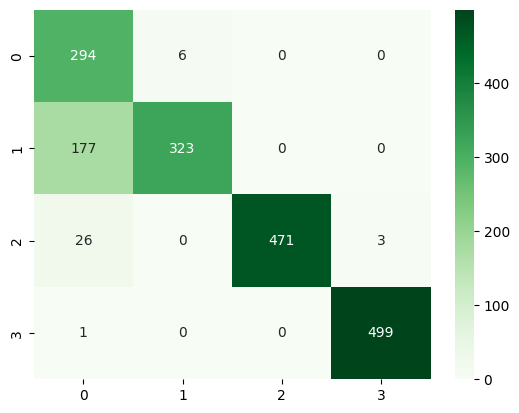

In [36]:
#plotting confusion matrix
import seaborn as sns
conmat=confusion_matrix(train_df['True cancer stage'],pred)
sns.heatmap(conmat,annot=True,fmt='g',cmap='Greens')